<a href="https://colab.research.google.com/github/SidharthArya/.bspwm/blob/master/Lab/001_Implementing_Gesture_Classifier_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## Fetching Data

In [ ]:

jump = pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/jump_set.csv")
run = pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/run_set.csv")
squat = pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/squat_set.csv")
walk = pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/walk_set.csv")
other = pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/other_set.csv")

## Data Preprocessing and Exploration

In [ ]:
SAMPLES_PER_GESTURE = 119
GESTURES = ["jump", "run", "squat", "walk", "other"]
jumparr = np.array(jump).reshape(-1,SAMPLES_PER_GESTURE,6)
runarr = np.array(run).reshape(-1,SAMPLES_PER_GESTURE,6)
squatarr = np.array(squat).reshape(-1,SAMPLES_PER_GESTURE,6)
walkarr = np.array(walk).reshape(-1,SAMPLES_PER_GESTURE,6)
otherarr = np.array(other).reshape(-1,SAMPLES_PER_GESTURE,6)

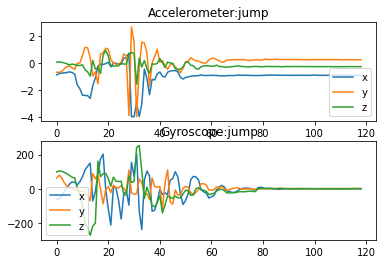

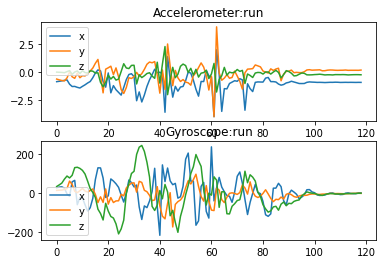

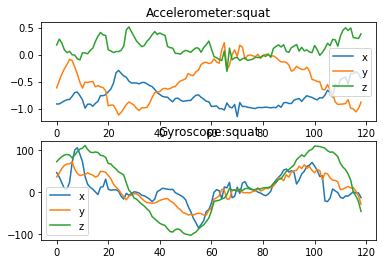

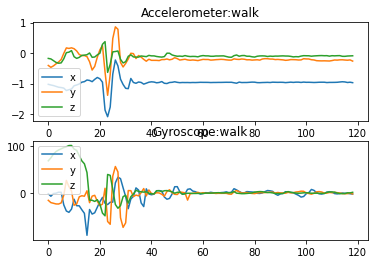

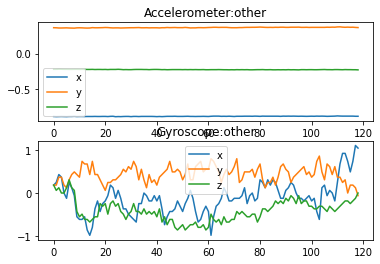

In [ ]:
# For 1 sample
for gesture in GESTURES:
  
  fig, ax = plt.subplots(2,1)
  for i,row in enumerate(ax):
    if i is 0:
      row.set_title("Accelerometer:" + gesture)
    else:
      row.set_title("Gyroscope:" + gesture) 
    
    row.plot(eval(gesture +"arr")[0,:,3*i], label="x")
    row.plot(eval(gesture +"arr")[0,:,3*i+1], label="y")
    row.plot(eval(gesture +"arr")[0,:,3*i+2], label="z")
    row.legend()

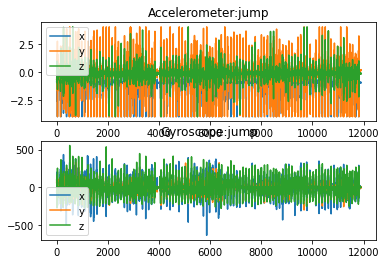

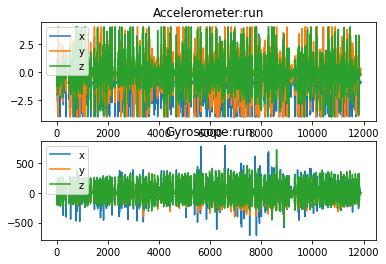

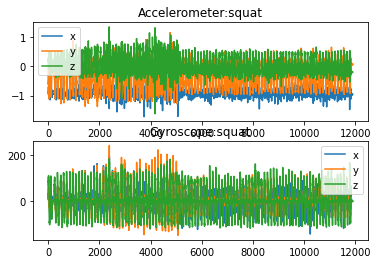

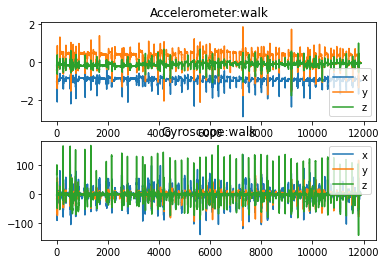

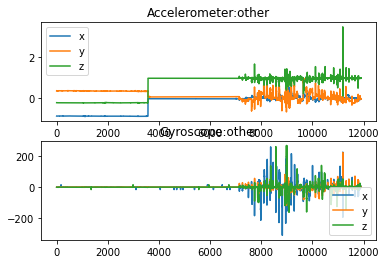

In [ ]:
# For all sample
for gesture in GESTURES:
  
  fig, ax = plt.subplots(2,1)
  for i,row in enumerate(ax):
    if i is 0:
      row.set_title("Accelerometer:" + gesture)
    else:
      row.set_title("Gyroscope:" + gesture) 
    
    row.plot(eval(gesture +"arr").reshape(11900,6)[:,3*i], label="x")
    row.plot(eval(gesture +"arr").reshape(11900,6)[:,3*i+1], label="y")
    row.plot(eval(gesture +"arr").reshape(11900,6)[:,3*i+2], label="z")
    row.legend()

## Data Preprocessing

In [ ]:
inputs = np.array([eval(gesture + "arr") for gesture in GESTURES])

In [ ]:
inputs.shape, jump.shape, jumparr.shape

((5, 100, 119, 6), (11900, 6), (100, 119, 6))

In [ ]:
NUM_GESTURES = len(GESTURES)
ONE_HOT_ENCODED = np.eye(NUM_GESTURES)
outputs = np.array([[ONE_HOT_ENCODED[i] for sample in arr_gesture] for i,arr_gesture in enumerate(inputs)])

In [ ]:
outputs.shape, inputs.shape

((5, 100, 5), (5, 100, 119, 6))

In [ ]:
X = inputs.reshape(-1,SAMPLES_PER_GESTURE, 6)
Y = outputs.reshape(-1, 5)

In [ ]:
X.shape, Y.shape

((500, 119, 6), (500, 5))

In [ ]:
input_shape = X[0].shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model 1 (With Dense Layers)

In [ ]:
model = tf.keras.Sequential(
      [
       tf.keras.layers.Dense(512,input_shape=input_shape, activation="relu"),
       tf.keras.layers.Dense(256, activation='relu'),
       tf.keras.layers.Dropout(.1),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dropout(.1),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(5,activation = "sigmoid")
      ])



In [ ]:
model.compile(optimizer="adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 119, 512)          3584      
_________________________________________________________________
dense_16 (Dense)             (None, 119, 256)          131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 119, 256)          0         
_________________________________________________________________
dense_17 (Dense)             (None, 119, 128)          32896     
_________________________________________________________________
dense_18 (Dense)             (None, 119, 64)           8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 119, 64)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 7616)             

In [ ]:
model.fit(X_train, y_train,
          epochs = 100,
          validation_split = 0.2,
          batch_size=10,
          verbose=True)

Epoch 1/100
32/32 [==============================] - 2s 44ms/step - loss: 1.9576 - accuracy: 0.5113 - val_loss: 0.6444 - val_accuracy: 0.8250
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3584 - accuracy: 0.8663 - val_loss: 0.6547 - val_accuracy: 0.8750
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.1149 - accuracy: 0.9647 - val_loss: 0.5567 - val_accuracy: 0.8500
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.1031 - accuracy: 0.9528 - val_loss: 0.5230 - val_accuracy: 0.8625
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0709 - accuracy: 0.9687 - val_loss: 0.4899 - val_accuracy: 0.8875
Epoch 6/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0284 - accuracy: 0.9891 - val_loss: 0.7798 - val_accuracy: 0.9250
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0100 - accuracy: 0.9951 - val_loss: 0.7445 - val_accuracy: 0.9250
Epoch 

In [ ]:
predictions = model.predict(X_test)

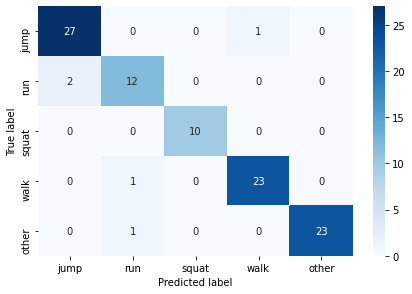

In [ ]:
cm = tf.math.confusion_matrix(labels=tf.argmax(y_test, 1), predictions=tf.argmax(predictions, 1))
axis_labels = GESTURES
figure = plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Current Model Size
model.save('models/first.h5')

In [ ]:

!du -h models/first.h5

2.5M	models/first.h5


## Pruning

In [ ]:
! pip install -q tensorflow-model-optimization

In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 10
epochs = 100
validation_split = 0.2 # 10% of training set will be used for validation set. 

num_images = 100*(1-validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
                          loss = "categorical_crossentropy",
              
              metrics=['accuracy'])

model_for_pruning.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_dense_15 (None, 119, 512)          6658      
_________________________________________________________________
prune_low_magnitude_dense_16 (None, 119, 256)          262402    
_________________________________________________________________
prune_low_magnitude_dropout_ (None, 119, 256)          1         
_________________________________________________________________
prune_low_magnitude_dense_17 (None, 119, 128)          65666     
_________________________________________________________________
prune_low_magnitude_dense_18 (None, 119, 64)           16450     
_________________________________________________________________
prune_low_magnitude_dropout_ (None, 119, 64)           1         
_________________________________________________________________
prune_low_magnitude_flatten_ (None, 7616)             

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [ ]:
import tempfile
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(X_train, y_train,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

Epoch 1/100
 5/32 [===>..........................] - ETA: 3s - loss: 0.0017 - accuracy: 1.0000WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0376s vs `on_train_batch_end` time: 0.0676s). Check your callbacks.


32/32 [==============================] - 5s 63ms/step - loss: 0.0122 - accuracy: 0.9983 - val_loss: 1.4634 - val_accuracy: 0.9250
Epoch 2/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0109 - accuracy: 0.9942 - val_loss: 1.3775 - val_accuracy: 0.9000
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0515 - accuracy: 0.9870 - val_loss: 1.4106 - val_accuracy: 0.9000
Epoch 4/100
32/32 [==============================] - 1s 42ms/step - loss: 0.0085 - accuracy: 0.9994 - val_loss: 1.0210 - val_accuracy: 0.9125
Epoch 5/100
32/32 [==============================] - 1s 42ms/step - loss: 0.0068 - accuracy: 0.9956 - val_loss: 0.9431 - val_accuracy: 0.9125
Epoch 6/100
32/32 [==============================] - 1s 42ms/step - loss: 3.1436e-04 - accuracy: 1.0000 - val_loss: 1.0467 - val_accuracy: 0.9375
Epoch 7/100
32/32 [==============================] - 1s 42ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8363 - val_accuracy: 0.9125
Epoch 8/100
32

In [ ]:
print(keras_file)

models/third.h5


In [ ]:
keras_file = "models/second.h5"
tf.keras.models.save_model(model, keras_file, include_optimizer=False)

In [ ]:
# Model Size Before Pruning
!du -h models/second.h5

860K	models/second.h5


In [ ]:
predictions = model_for_pruning.predict(X_test)

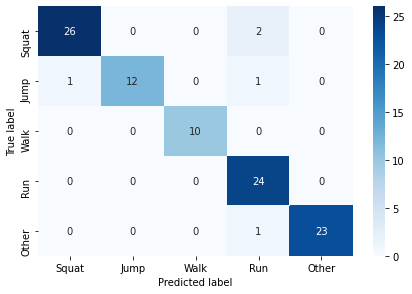

In [ ]:
cm = tf.math.confusion_matrix(labels=tf.argmax(y_test, 1), predictions=tf.argmax(predictions, 1))
axis_labels = ["Squat", "Jump", "Walk", "Run", "Other"]
figure = plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
keras_file = "models/third.h5"
tf.keras.models.save_model(model_for_pruning, keras_file, include_optimizer=False)

In [ ]:
## Unpruned Model
! du -h models/third.h5

1.7M	models/third.h5


In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

pruned_keras_file = 'models/fourth.h5'
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

Saved pruned Keras model to: models/fourth.h5


In [ ]:
 # Size of Pruned Model
 !du -h models/fourth.h5

860K	models/fourth.h5


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

pruned_tflite_file = 'models/fifth.tflite'

with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

print('Saved pruned TFLite model to:', pruned_tflite_file)

INFO:tensorflow:Assets written to: /tmp/tmpaw_hp2cd/assets


INFO:tensorflow:Assets written to: /tmp/tmpaw_hp2cd/assets


Saved pruned TFLite model to: models/fifth.tflite


In [ ]:
# Size of TFLite Model
!du -h models/fifth.tflite

848K	models/fifth.tflite


# Model 2 (Using Convnet)

In [ ]:
model = tf.keras.Sequential(
      [
       tf.keras.layers.Input(shape=input_shape),
       tf.keras.layers.Conv1D(3, kernel_size=3),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.MaxPool1D(),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(10, activation='relu'),
       tf.keras.layers.Dropout(.1),
       tf.keras.layers.Dense(5,activation = "sigmoid")
      ])



In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 1.5727 - accuracy: 0.2989
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3128 - accuracy: 0.4788
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1311 - accuracy: 0.6180
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 1.0391 - accuracy: 0.6196
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9319 - accuracy: 0.6299
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.8935 - accuracy: 0.6709
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7789 - accuracy: 0.6827
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7510 - accuracy: 0.6634
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7032 - accuracy: 0.6716
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6247 - accuracy: 0.7194
Epoch 11/

In [ ]:
predictions= model.predict(X_test)

In [ ]:
cm=tf.math.confusion_matrix(tf.argmax(y_test,1), tf.argmax(predictions,1))

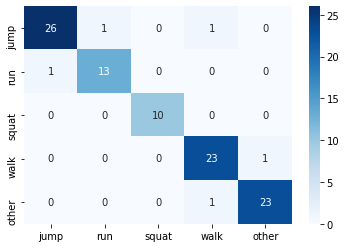

In [ ]:
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=GESTURES, yticklabels=GESTURES)

In [ ]:
tf.keras.models.save_model(model, "cmodels/first.h5", include_optimizer=False)

In [ ]:
! du -h cmodels/first.h5

36K	cmodels/first.h5


# Model 3 ( Using LSTM )

In [ ]:
lmodel = tf.keras.Sequential(
      [
       tf.keras.layers.Input(shape=input_shape),
       tf.keras.layers.LSTM(10),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(10, activation='relu'),
       tf.keras.layers.Dropout(.1),
       tf.keras.layers.Dense(5,activation = "sigmoid")
      ])



In [ ]:
lmodel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
lmodel.fit(X_train, y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 2s 35ms/step - loss: 1.8803 - accuracy: 0.2068
Epoch 2/200
13/13 [==============================] - 0s 35ms/step - loss: 1.7890 - accuracy: 0.2165
Epoch 3/200
13/13 [==============================] - 0s 34ms/step - loss: 1.6651 - accuracy: 0.2817
Epoch 4/200
13/13 [==============================] - 0s 35ms/step - loss: 1.5939 - accuracy: 0.2737
Epoch 5/200
13/13 [==============================] - 0s 36ms/step - loss: 1.5244 - accuracy: 0.2841
Epoch 6/200
13/13 [==============================] - 0s 35ms/step - loss: 1.5154 - accuracy: 0.3333
Epoch 7/200
13/13 [==============================] - 0s 34ms/step - loss: 1.4634 - accuracy: 0.3421
Epoch 8/200
13/13 [==============================] - 0s 35ms/step - loss: 1.4448 - accuracy: 0.3535
Epoch 9/200
13/13 [==============================] - 0s 35ms/step - loss: 1.3893 - accuracy: 0.3830
Epoch 10/200
13/13 [==============================] - 0s 36ms/step - loss: 1.3893 - accuracy: 0.3999

In [ ]:
predictions = model.predict(X_test)

In [ ]:
cm = tf.math.confusion_matrix(tf.argmax(y_test,1), tf.argmax(predictions,1))

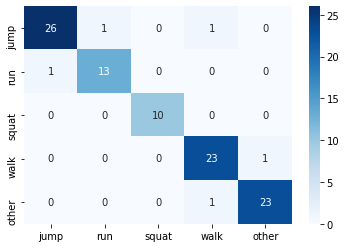

In [ ]:
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues,xticklabels=GESTURES, yticklabels=GESTURES)

In [145]:
tf.keras.models.save_model(model, "lmodels/first.h5", include_optimizer=False)

! du -h lmodels/first.h5

36K	lmodels/first.h5


# Model 4 (Using Transformers)

In [ ]:
\